# Mission to Mars

## Dependencies

In [15]:
from bs4 import BeautifulSoup as soup
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

## Executable Path

In [3]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [4]:
# Visit the mars nasa news site
url = 'https://redplanetscience.com'
browser.visit(url)
# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

True

In [6]:
# Set up the HTML parser
html = browser.html
news_soup = soup(html, 'html.parser')
# Assign 'slide_elem' as the variable to look for the <div /> parent element and its descendents
slide_elem = news_soup.select_one('div.list_text')

### Scraping Article Titles from RedPlanetScience.com

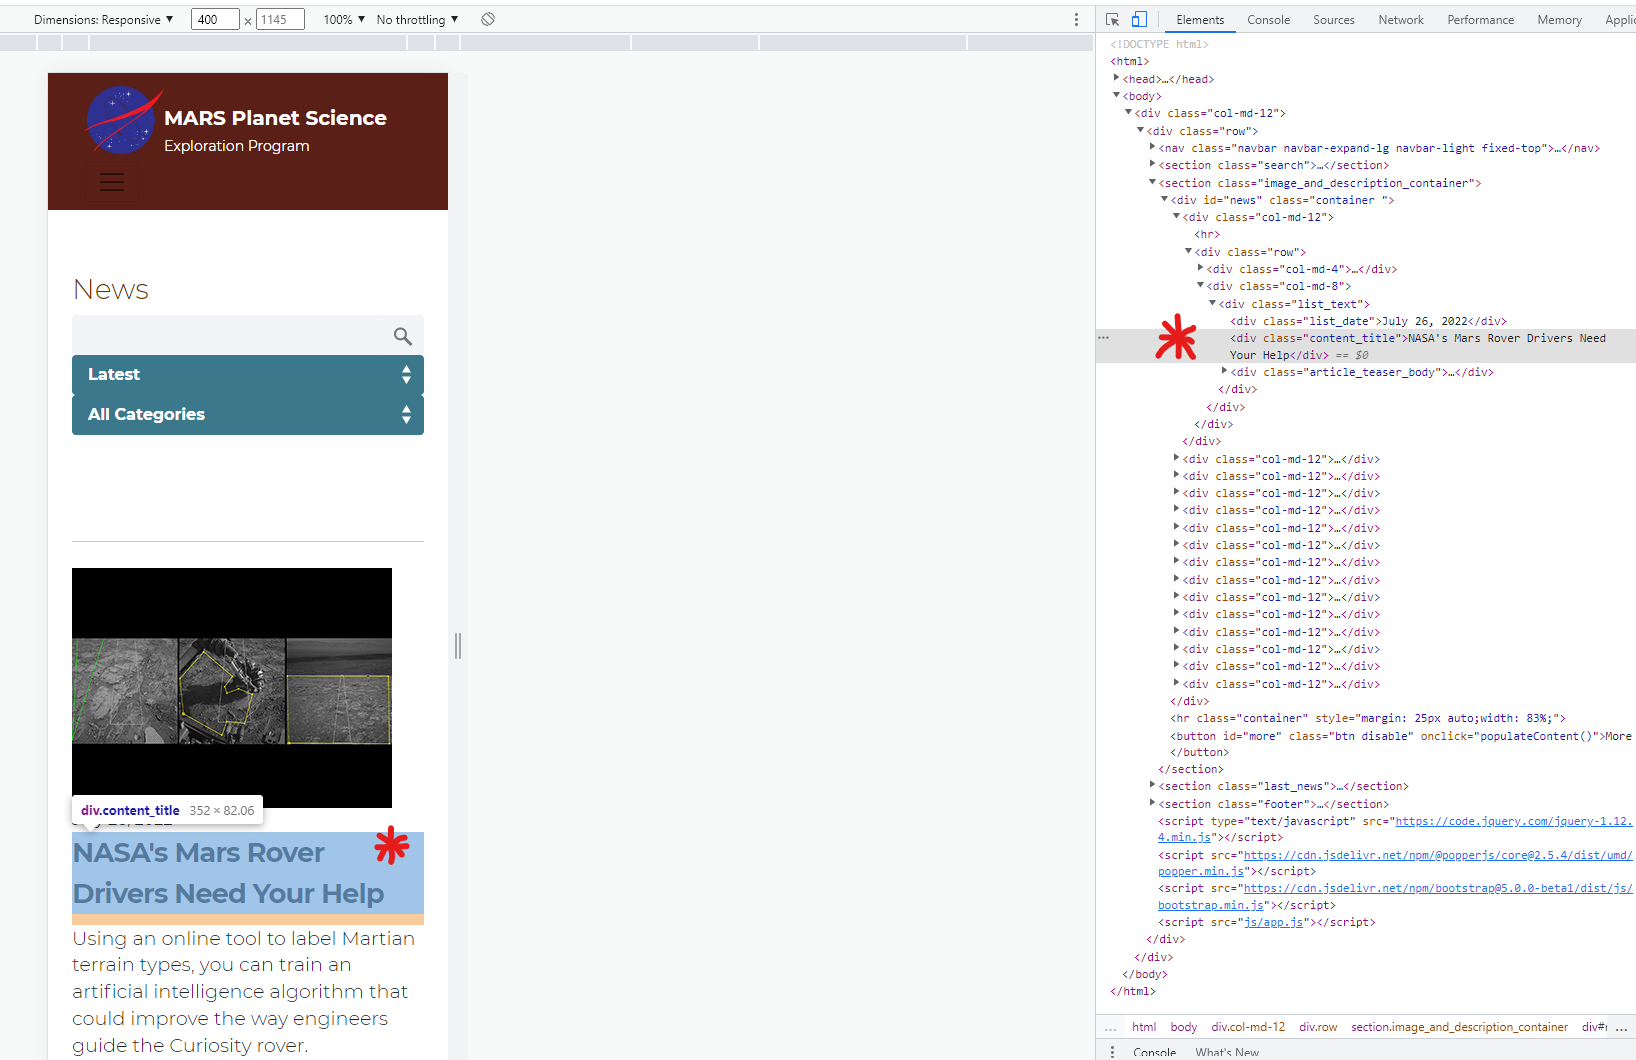

In [7]:
# assign the title and summary text to variables we'll reference later.
slide_elem.find('div', class_='content_title')

<div class="content_title">NASA's Perseverance Rover Will Look at Mars Through These 'Eyes'</div>

In [8]:
# Use the parent element to find the first `a` tag and save it as `news_title`
news_title = slide_elem.find('div', class_='content_title').get_text()
news_title

"NASA's Perseverance Rover Will Look at Mars Through These 'Eyes'"

In [9]:
# Use the parent element to find the paragraph text
news_p = slide_elem.find('div', class_='article_teaser_body').get_text()
news_p

'A pair of zoomable cameras will help scientists and rover drivers with high-resolution color images.'

### Featured Images
Image Scraping

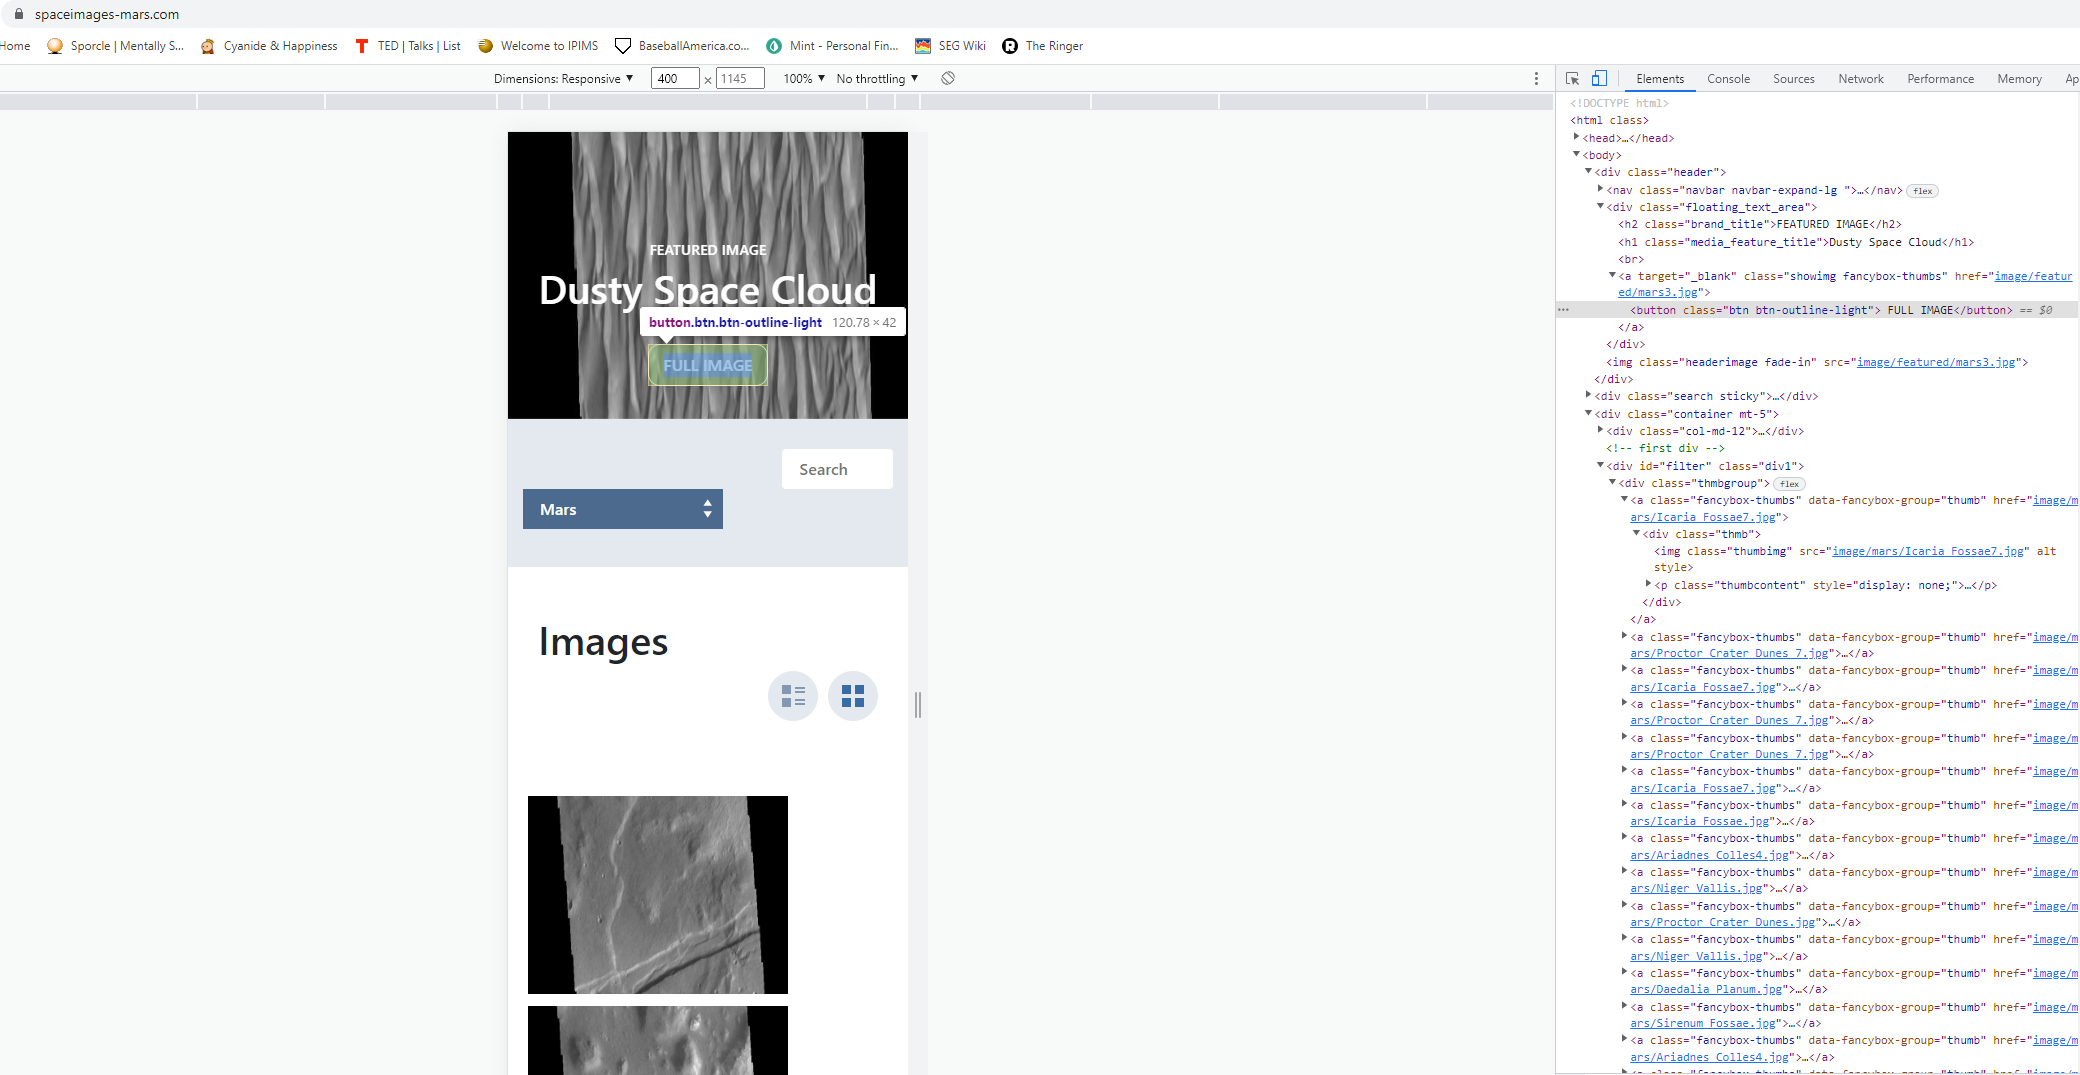

In [10]:
# Visit 'SpaceImages-Mars' URL
url = 'https://spaceimages-mars.com'
browser.visit(url)

In [11]:
# Find and click the 'Full Image' button (there are three instances of '<button', the Full Image button is the 2nd)
full_image_elem = browser.find_by_tag('button')[1]
full_image_elem.click()

In [12]:
# Parse the resulting html with soup
html = browser.html
img_soup = soup(html, 'html.parser')

We want the generic placeholder for the image (fancybox-image), not the specific name that will change depending on each image
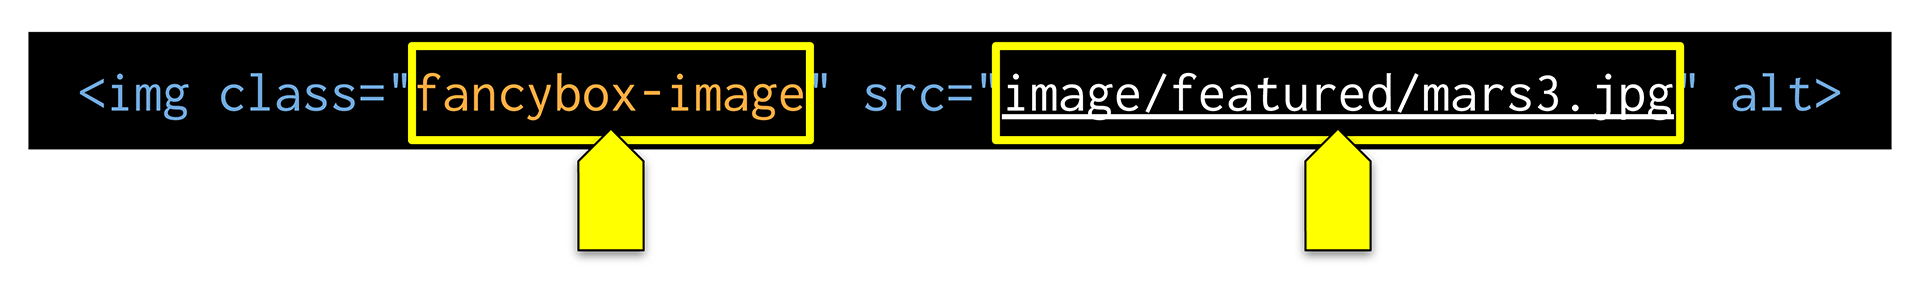

In [13]:
# Find the relative image url 
    # An img tag is nested within this HTML, so we've included it.
    # .get('src') pulls the link to the image.
img_url_rel = img_soup.find('img', class_='fancybox-image').get('src')
img_url_rel

'image/featured/mars1.jpg'

But if we copy and paste this 'img_url_rel' link into a browser, it won't work. This is because it's only a partial link, as the base URL isn't included. If we look at our address bar in the webpage, we can see the entire URL up there already; we just need to add the first portion ('https://spaceimages-mars.com') to our app.

In [14]:
# Use the base URL to create an absolute URL
img_url = f'https://spaceimages-mars.com/{img_url_rel}'
img_url

'https://spaceimages-mars.com/image/featured/mars1.jpg'

### Scraping a Table of Mars facts

In [20]:
# Pandas function read_html() specifically searches for and returns a list of tables found in the HTML. 
# By specifying an index of 0, we're telling Pandas to pull only the first table it encounters
df = pd.read_html('https://galaxyfacts-mars.com')[0]
df.columns=['description', 'Mars', 'Earth']
df.set_index('description', inplace=True)
df

,Mars,Earth
description,,
Mars - Earth Comparison,Mars,Earth
Diameter:,"6,779 km","12,742 km"
Mass:,6.39 × 10^23 kg,5.97 × 10^24 kg
Moons:,2,1
Distance from Sun:,"227,943,824 km","149,598,262 km"
Length of Year:,687 Earth days,365.24 days
Temperature:,-87 to -5 °C,-88 to 58°C


In [21]:
# Pandas also has a way to easily convert our DataFrame back into HTML-ready code using the .to_html() function.
df.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Mars</th>\n      <th>Earth</th>\n    </tr>\n    <tr>\n      <th>description</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Mars - Earth Comparison</th>\n      <td>Mars</td>\n      <td>Earth</td>\n    </tr>\n    <tr>\n      <th>Diameter:</th>\n      <td>6,779 km</td>\n      <td>12,742 km</td>\n    </tr>\n    <tr>\n      <th>Mass:</th>\n      <td>6.39 × 10^23 kg</td>\n      <td>5.97 × 10^24 kg</td>\n    </tr>\n    <tr>\n      <th>Moons:</th>\n      <td>2</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <th>Distance from Sun:</th>\n      <td>227,943,824 km</td>\n      <td>149,598,262 km</td>\n    </tr>\n    <tr>\n      <th>Length of Year:</th>\n      <td>687 Earth days</td>\n      <td>365.24 days</td>\n    </tr>\n    <tr>\n      <th>Temperature:</th>\n      <td>-87 to -5 °C</td>\n      <td>-88 to 58°C</td>\n    </tr>\n  </tbody>

In [22]:
# end the automated browsing session to avoid it running indefinitely in the background
browser.quit()